# Optimizing Levelset Filtrations

First, make sure your version of BATS.py is up-to-date...

In [1]:
import bats
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def freudenthal_grid(m, n):
    """
    Freudenthal triangulation of a m x n grid
    """
    
    def _get_idx(i, j):
        """
        get index of grid in row-major order
        """
        return j + n * i;
    
    
    X = bats.SimplicialComplex()
    
    for i in range(m-1):
        for j in range(n-1):
            k1 = _get_idx(i,j)
            k2 = _get_idx(i+1,j)
            k3 = _get_idx(i,j+1)
            k4 = _get_idx(i+1,j+1)
            X.add_recursive([k1,k2,k4])
            X.add_recursive([k1,k3,k4])

    return X

In [3]:
m = 100
n = 100
X = freudenthal_grid(m, n)

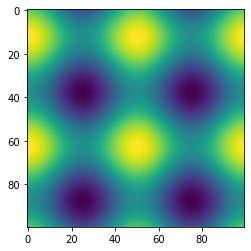

In [4]:
f = np.empty((m,n))
for i in range(m):
    for j in range(n):
        f[i,j] = np.sin(4*np.pi*i/m) + np.cos(4*np.pi*j/n)
        
plt.imshow(f)

now, we extend the image to a filtration on X

In [5]:
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

time to extend: 0.012071449993527494 sec.


We construct the filtered simplicial complex

In [6]:
t0 = time.monotonic()
F = bats.FilteredSimplicialComplex(X, vals)
t1 = time.monotonic()
print("time to construct: {} sec.".format(t1 - t0))

time to construct: 0.01771419199940283 sec.


In [7]:
t0 = time.monotonic()
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("time to reduce: {} sec.".format(t1 - t0))

time to reduce: 0.11347617000865284 sec.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

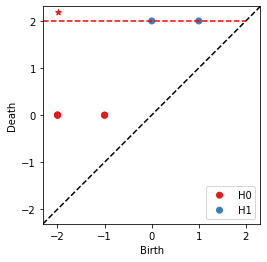

In [8]:
ps = R.persistence_pairs(0, False) +  R.persistence_pairs(1, False)
bats.persistence_diagram(ps)

In [9]:
nzps = []
for p in ps:
    if p.length() > 0:
        print(p)
        nzps.append(p)

0 : (-1.99803,inf) <3725,-1>
0 : (-1.99803,0.00197327) <3775,10979>
0 : (-1.99803,-0.00197327) <8825,18948>
0 : (-1.99803,-0.00197327) <8875,19098>
0 : (-1,-0.00197327) <51,4048>
0 : (-1,-0.00197327) <151,4198>
1 : (0.00197327,1.99803) <26177,12575>
1 : (1,1.99803) <203,2675>


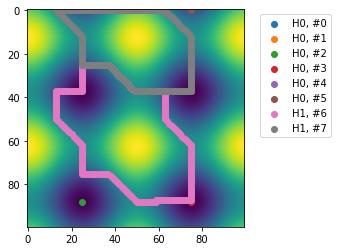

In [10]:
# visualization of a representative
plt.imshow(f, origin='upper')

for pi, p in enumerate(nzps):
    c = R.representative(p, False)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Now, we'll update the filtration

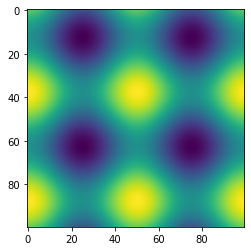

In [11]:
f = np.empty((m,n))
for i in range(m):
    for j in range(n):
        f[i,j] = -np.sin(4*np.pi*i/m) + np.cos(4*np.pi*j/n)
        
plt.imshow(f)

In [12]:
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

time to extend: 0.010395393997896463 sec.


In [13]:
t0 = time.monotonic()
R.update_filtration(vals)
t1 = time.monotonic()
print("time to update: {} sec.".format(t1 - t0))

time to update: 0.09140603699779604 sec.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

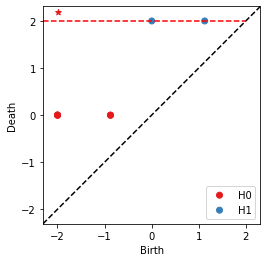

In [14]:
ps = R.persistence_pairs(0) + R.persistence_pairs(1)
bats.persistence_diagram(ps)

In [15]:
nzps = []
for p in ps:
    if p.length() > 0:
        print(p)
        nzps.append(p)

0 : (-1.99803,inf) <1225,-1>
0 : (-1.99803,0.00197327) <1275,3529>
0 : (-1.99803,-0.00197327) <6225,11498>
0 : (-1.99803,-0.00197327) <6275,11648>
0 : (-0.874667,-0.00197327) <9925,26398>
0 : (-0.874667,-0.00197327) <9975,26548>
1 : (0.00197327,1.99803) <18429,7625>
1 : (1.12533,1.99803) <29455,17525>


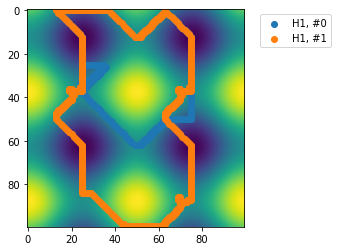

In [16]:
# visualization of a representative
plt.imshow(f, origin='upper')

for pi, p in enumerate(nzps[-2:]):
    c = R.representative(p)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [17]:
p = nzps[-1]
print(p)

1 : (1.12533,1.99803) <29455,17525>


## Compare to doing reduction again

time to construct: 0.02408812299836427 sec.
time to reduce: 0.1296589379926445 sec.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

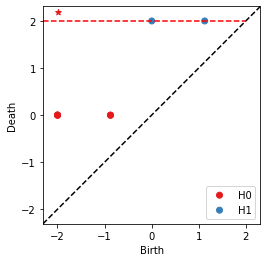

In [18]:
t0 = time.monotonic()
F2 = bats.FilteredSimplicialComplex(X, vals)
t1 = time.monotonic()
print("time to construct: {} sec.".format(t1 - t0))

t0 = time.monotonic()
R2 = bats.reduce(F2, bats.F2())
t1 = time.monotonic()
print("time to reduce: {} sec.".format(t1 - t0))

ps = R2.persistence_pairs(0) + R2.persistence_pairs(1)
bats.persistence_diagram(ps)

In [19]:
nzps = []
for p in ps:
    if p.length() > 0:
        print(p)
        nzps.append(p)

0 : (-1.99803,inf) <1225,-1>
0 : (-1.99803,0.00197327) <1275,3529>
0 : (-1.99803,-0.00197327) <6225,11498>
0 : (-1.99803,-0.00197327) <6275,11648>
0 : (-0.874667,-0.00197327) <9925,26398>
0 : (-0.874667,-0.00197327) <9975,26548>
1 : (0.00197327,1.99803) <18429,7625>
1 : (1.12533,1.99803) <29455,17525>


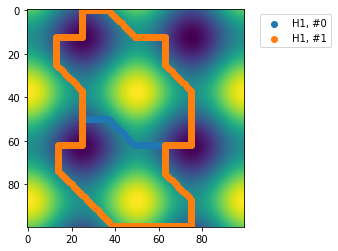

In [20]:
# visualization of a representative
plt.imshow(f, origin='upper')

for pi, p in enumerate(nzps[-2:]):
    c = R2.representative(p)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Go back to original levelset filtration

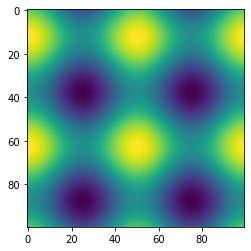

In [21]:
f = np.empty((m,n))
for i in range(m):
    for j in range(n):
        f[i,j] = np.sin(4*np.pi*i/m) + np.cos(4*np.pi*j/n)
        
plt.imshow(f)

time to extend: 0.011895318995811976 sec.
time to update: 0.06621495699801017 sec.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

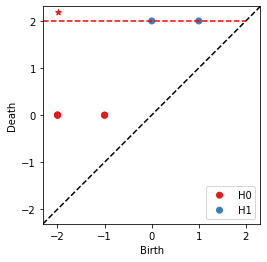

In [22]:
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

t0 = time.monotonic()
R.update_filtration(vals)
t1 = time.monotonic()
print("time to update: {} sec.".format(t1 - t0))

ps = R.persistence_pairs(0) + R.persistence_pairs(1)
bats.persistence_diagram(ps)

In [23]:
nzps = []
for p in ps:
    if p.length() > 0:
        print(p)
        nzps.append(p)

0 : (-1.99803,inf) <3725,-1>
0 : (-1.99803,0.00197327) <3775,10979>
0 : (-1.99803,-0.00197327) <8825,18948>
0 : (-1.99803,-0.00197327) <8875,19098>
0 : (-1,-0.00197327) <51,4048>
0 : (-1,-0.00197327) <151,4198>
1 : (0.00197327,1.99803) <26177,12575>
1 : (1,1.99803) <203,2675>


''

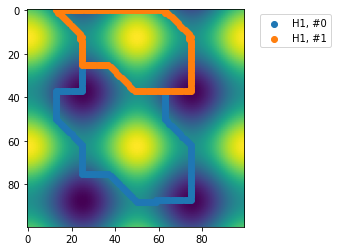

In [24]:
# visualization of a representative
plt.imshow(f, origin='upper')

for pi, p in enumerate(nzps[-2:]):
    c = R.representative(p)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
;

# Visualize Critical Simplices
These are the simplices that birth and kill a homology class

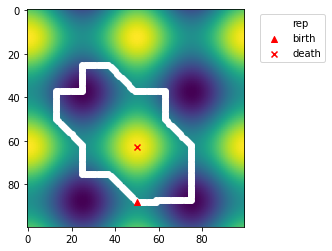

In [25]:
p = nzps[-2]
d = p.dim()
plt.imshow(f)

# representative
c = R.representative(p)
skel0 = []
for i in c.nzinds():
    skel0.extend(X.get_simplex(d, i))

skel0 = np.unique(skel0)
xx = skel0 % m
yy = skel0 // m
plt.scatter(xx[:],yy[:],c='w',label="rep")

bskel = np.array([imap[d][p.birth_ind()]])
xx = bskel % m
yy = bskel // m
plt.scatter(xx[:],yy[:],  c='r', marker='^', label="birth")
if p.death_ind() != 18446744073709551615:
    dskel = np.array([imap[d+1][p.death_ind()]])
    xx = dskel % m
    yy = dskel // m
    plt.scatter(xx[:],yy[:], c='r', marker='x', label="death")
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Optimization Over Persistence Diagrams

Let's try maximizing the sum of H1 lengths.  We want to do this by decreasing H1 births and increasing H1 deaths.

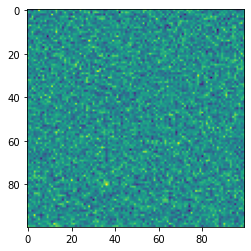

In [26]:
f = np.random.randn(m,n)
plt.imshow(f);

In [27]:
R.maxdim()

2

In [28]:
def tot_nnz(R, pstring=None):
    ct = 0
    C = R.reduced_complex()
    for k in range(R.maxdim() + 1):
        ct = ct + C.U(k).nnz() + C.R(k).nnz()
    
    if pstring is not None:
        print(pstring.format(ct))
    return ct
    


In [30]:
lr = 0.1 # persistence penalty

f0 = f
f = f.flatten()
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f)
F = bats.FilteredSimplicialComplex(X, vals)
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("initialization: {} sec.".format(t1-t0))

nnz = []
tup = []

for i in range(20):
    # extend filtration
    t0a = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, f)
    t1 = time.monotonic()
    print("\textension: {} sec.".format(t1 - t0a))
    # compute persistence
    t0 = time.monotonic()
    R.update_filtration(vals)
    t1 = time.monotonic()
    print("\tupdate: {} sec.".format(t1 - t0))
    tup.append(t1 - t0)
    nnz.append(tot_nnz(R, pstring="\tnnz: {}"))
    # get 1-dimensional pairs
    t0 = time.monotonic()
    ps = R.persistence_pairs(1)
    t1a = time.monotonic()
    print("\tpairs: {} sec.".format(t1a - t0))
    print("iter {}: {} sec.".format(i, t1a-t0a))
    for p in ps:
        d = p.dim()
        bi = imap[d][p.birth_ind()] # maps birth_ind to pixel where it appeared
        di = imap[d+1][p.death_ind()] # maps death_ind to pixel where it appeared
        f[bi] = f[bi] - lr
        f[di] = f[di] + lr


initialization: 0.1552077699889196 sec.
	extension: 0.017316137003945187 sec.
	update: 0.01874729599512648 sec.
	nnz: 557939
	pairs: 0.02251890600018669 sec.
iter 0: 0.08523606200469658 sec.
	extension: 0.010978741003782488 sec.
	update: 0.017982794001000002 sec.
	nnz: 568613
	pairs: 0.017681454002740793 sec.
iter 1: 0.07162886900187004 sec.
	extension: 0.018497648008633405 sec.
	update: 0.022034855996025726 sec.
	nnz: 570577
	pairs: 0.030080269993050024 sec.
iter 2: 0.09736836400406901 sec.
	extension: 0.012447297995095141 sec.
	update: 0.021268778989906423 sec.
	nnz: 577569
	pairs: 0.018110276010702364 sec.
iter 3: 0.07862408900109585 sec.
	extension: 0.014280404997407459 sec.
	update: 0.023120220997952856 sec.
	nnz: 595844
	pairs: 0.019151838001562282 sec.
iter 4: 0.0948366679949686 sec.
	extension: 0.011853030999191105 sec.
	update: 0.023637010002858005 sec.
	nnz: 599479
	pairs: 0.01834927999880165 sec.
iter 5: 0.0820529019983951 sec.
	extension: 0.015278238002792932 sec.
	update: 

exponent in nnz = 2.3841467143478066


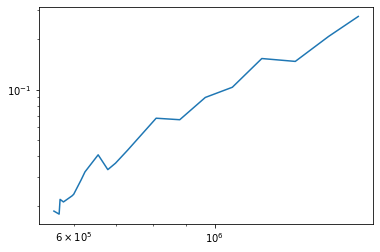

In [31]:
plt.loglog(nnz, tup)
a, b = np.polyfit(np.log(nnz), np.log(tup), 1)
print("exponent in nnz = {}".format(a))

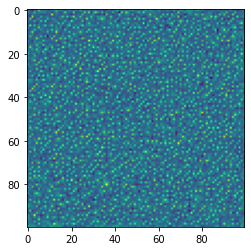

In [32]:
f = f.reshape((m,n))
plt.imshow(f)

## optimization with regularization

we'll add a smoothing parameter

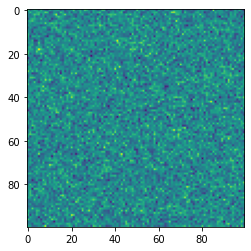

In [33]:
f = np.random.randn(m,n)
plt.imshow(f);

In [34]:
def _get_idx(i, j):
    """
    get index of grid in row-major order
    """
    return j + n * i;

lr = 0.2 # persistence penalty
eps = 0.01 # smoothing parameter

f0 = f
f = f.flatten()
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f)
F = bats.FilteredSimplicialComplex(X, vals)
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("initialization: {} sec.".format(t1-t0))

for i in range(20):
    # extend filtration
    t0a = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, f)
    t1 = time.monotonic()
    print("\textension: {} sec.".format(t1 - t0a))
    # compute persistence
    t0 = time.monotonic()
    R.update_filtration(vals)
    t1 = time.monotonic()
    print("\tupdate: {} sec.".format(t1 - t0))
    # get 1-dimensional pairs
    t0 = time.monotonic()
    ps = R.persistence_pairs(1)
    t1a = time.monotonic()
    print("\tpairs: {} sec.".format(t1a - t0))
    print("iter {}: {} sec.".format(i, t1a-t0a))
    # apply smoothing parameter
    f = f.reshape((m,n))
    f[1:-1, 1:-1] = (1-eps) * f[1:-1, 1:-1] + eps/4*(f[:-2, :-2] + f[2:, 2:] + f[:-2,2:] + f[2:,:-2])
    f = f.flatten()
    # apply persistence function
    for p in ps:
        d = p.dim()
        bi = imap[d][p.birth_ind()] # maps birth_ind to pixel where it appeared
        di = imap[d+1][p.death_ind()] # maps death_ind to pixel where it appeared
        f[bi] = f[bi] - lr
        f[di] = f[di] + lr

initialization: 0.158320097005344 sec.
	extension: 0.01522375199419912 sec.
	update: 0.01525588300137315 sec.
	pairs: 0.018718594990787096 sec.
iter 0: 0.04931774399301503 sec.
	extension: 0.010654174009687267 sec.
	update: 0.02276164200156927 sec.
	pairs: 0.019408571999520063 sec.
iter 1: 0.053112649999093264 sec.
	extension: 0.01554906899400521 sec.
	update: 0.029447847002302296 sec.
	pairs: 0.018380840003374033 sec.
iter 2: 0.06350831499730702 sec.
	extension: 0.01310637300775852 sec.
	update: 0.02985235799860675 sec.
	pairs: 0.018189242997323163 sec.
iter 3: 0.06130058800044935 sec.
	extension: 0.012951832002727315 sec.
	update: 0.036064968997379765 sec.
	pairs: 0.018824986007530242 sec.
iter 4: 0.06808867100335192 sec.
	extension: 0.011934137000935152 sec.
	update: 0.04257396799221169 sec.
	pairs: 0.024111701000947505 sec.
iter 5: 0.07876800099620596 sec.
	extension: 0.025090082999668084 sec.
	update: 0.07385869599238504 sec.
	pairs: 0.03426789099466987 sec.
iter 6: 0.133834078995

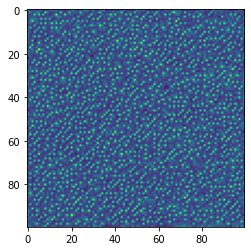

In [35]:
f = f.reshape((m,n))
plt.imshow(f)